### Load Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

### Prepare dataset

In [2]:
d = load_digits()
X = d.data
Y = d.target

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=.20,
                                               random_state=0)

In [6]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(1437, 64) (360, 64) (1437,) (360,)


### Classification (Training) 

In [7]:
from sklearn.linear_model import LogisticRegression

In [10]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression()
lg.fit(xtrain, ytrain)

LogisticRegression()

### Evaluation

In [11]:
print("Training Score: ", lg.score(xtrain, ytrain))
print("Testing Score: ", lg.score(xtest, ytest))

Training Score:  1.0
Testing Score:  0.9666666666666667


### Prediction

In [12]:
tst_prediction = lg.predict(xtest)
tr_prediction = lg.predict(xtrain)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
print("Training Score: ", accuracy_score(ytrain, tr_prediction))
print("Testing Score: ", accuracy_score(ytest, tst_prediction))

Training Score:  1.0
Testing Score:  0.9666666666666667


### Analyse result

In [16]:
df = pd.DataFrame({'Actual':ytest, 'Prediction':tst_prediction})
df.head(2)

Actual  Prediction
0       2           2
1       8           8

In [21]:
ytest.shape

(360,)

In [23]:
df[df["Actual"]!=df["Prediction"]]

Actual  Prediction
56        5           9
84        5           9
94        7           4
118       6           1
124       8           1
130       9           5
181       5           9
196       8           1
235       2           3
315       4           7
331       1           8
335       8           2

### Let's evaluate by visualization

In [25]:
xtest.shape

(360, 64)

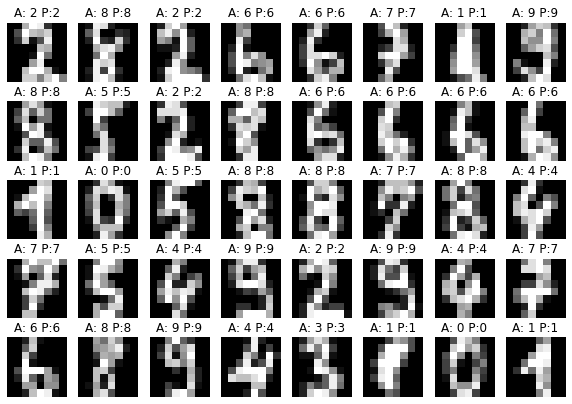

In [33]:
c=1
plt.figure(figsize=(10,7))
for i in range(40):
    plt.subplot(5,8,c)
    plt.imshow(xtest[i].reshape(8,8), cmap='gray')
    plt.title(f"A: {ytest[i]} P:{tst_prediction[i]}")
    plt.axis('off')
    c+=1